### The Quantum Fourier Transform converts a quantum state from the computational basis (|0⟩, |1⟩, etc.) into a Fourier basis.

In [16]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="qiskit_ibm_provider")

In [17]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.circuit.library import QFT
from qiskit.visualization import plot_histogram, circuit_drawer


In [18]:
# ✅ 1. Define the quantum circuit first
circuit = QuantumCircuit(5, 5)
circuit.x([0])
circuit.x([2])
circuit.x([4])

In [19]:
# ✅ 2. Apply QFT (Hadamard and controlled rotation gates)
qft = QFT(num_qubits=5, approximation_degree=0, do_swaps=True, inverse=False, insert_barriers=False, name="qft1")
circuit.append(qft, range(5))

# ✅ 3. Add measurements
circuit.measure(range(5), range(5))
#After QFT, the information about the original state (|10101⟩) is now encoded in phase differences, not in which bit is 1 or 0.

In [20]:
# ✅ 4. Simulate
backend = AerSimulator()
compiled = transpile(circuit, backend)
job = backend.run(compiled, shots=100)
result = job.result()
a = result.get_counts()

print(a)

{'00110': 2, '01111': 5, '00101': 3, '01110': 3, '11111': 5, '01001': 4, '10010': 5, '10101': 7, '00001': 4, '00000': 2, '01011': 5, '01101': 3, '11110': 4, '11101': 5, '01010': 3, '11000': 4, '10111': 4, '10100': 5, '00111': 2, '10011': 5, '00010': 4, '01100': 2, '11001': 1, '01000': 2, '11010': 6, '00100': 1, '10000': 2, '11011': 1, '11100': 1}


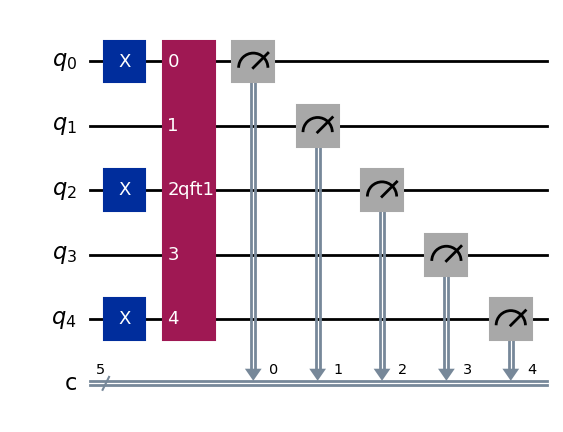

In [21]:
# ✅ 5. Visualize

circuit_drawer(circuit, output="mpl", style='iqp')


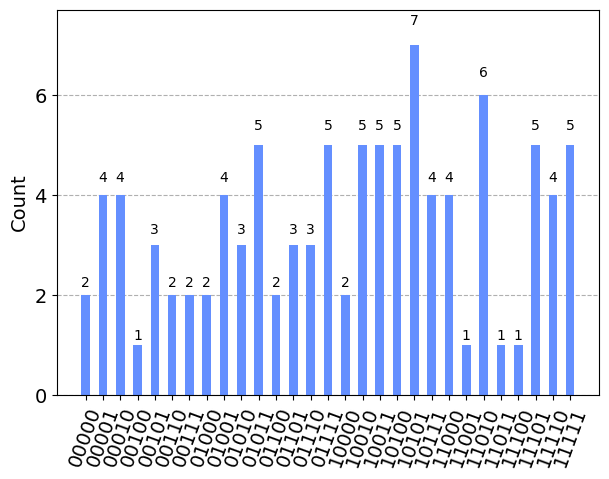

In [22]:
plot_histogram(a)